<a href="https://colab.research.google.com/github/probml/probml-notebooks/blob/main/notebooks/genmo_types_implicit_explicit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Types of models: implicit or explicit models

Author: Mihaela Rosca 

We use a simple example below (a mixture of Gaussians in 1 dimension) to exemplify the different between explicit generative models (with an associated density which we can query) and implicit generative models (which have an associated density but which we cannot query for likelhoods, but we can sample from it).

In [ ]:
import random
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [ ]:
sns.set(rc={"lines.linewidth": 2.8}, font_scale=2)
sns.set_style("whitegrid")

In [ ]:
# We implement our own very simple mixture, relying on scipy for the mixture
# components.


class SimpleGaussianMixture(object):
    def __init__(self, mixture_weights, mixture_components):
        self.mixture_weights = mixture_weights
        self.mixture_components = mixture_components

    def sample(self, num_samples):
        # First sample from the mixture
        mixture_choices = np.random.choice(
            range(0, len(self.mixture_weights)), p=self.mixture_weights, size=num_samples
        )
        # And then sample from the chosen mixture
        return np.array([self.mixture_components[mixture_choice].rvs(size=1) for mixture_choice in mixture_choices])

    def pdf(self, x):
        value = 0.0
        for index, weight in enumerate(self.mixture_weights):
            # Assuming using scipy distributions for components
            value += weight * self.mixture_components[index].pdf(x)
        return value

In [ ]:
mix = 0.4
mixture_weight = [mix, 1.0 - mix]
mixture_components = [scipy.stats.norm(loc=-1, scale=0.1), scipy.stats.norm(loc=1, scale=0.5)]

mixture = SimpleGaussianMixture(mixture_weight, mixture_components)

In [ ]:
mixture.sample(10)

array([[-0.90305697],
       [-1.03861132],
       [ 0.83955071],
       [ 0.80347068],
       [ 0.89049595],
       [-0.94825858],
       [ 0.4893882 ],
       [ 0.68795869],
       [ 0.8287332 ],
       [ 1.02378394]])

In [ ]:
mixture.pdf([10, 1])

array([2.11049945e-71, 4.78730736e-01])

In [ ]:
data_samples = mixture.sample(30)
len(data_samples)

30

In [ ]:
data_samples

array([[-1.0482792 ],
       [ 1.30985119],
       [ 0.95881443],
       [-0.98818416],
       [-1.11125221],
       [ 0.57572352],
       [-1.02795049],
       [ 0.65697617],
       [ 0.98568031],
       [-1.05683837],
       [-1.01304654],
       [ 0.7774806 ],
       [-0.88933818],
       [ 0.67419177],
       [ 0.98269454],
       [-1.0555719 ],
       [ 1.22645669],
       [ 0.70920848],
       [-1.17200768],
       [ 0.7185735 ],
       [ 0.35019706],
       [ 0.60214806],
       [ 0.40014463],
       [-0.90183163],
       [ 0.59036132],
       [ 1.71289993],
       [-0.83593572],
       [-1.0252203 ],
       [ 1.74464957],
       [-1.23426233]])

([], <a list of 0 Text major ticklabel objects>)

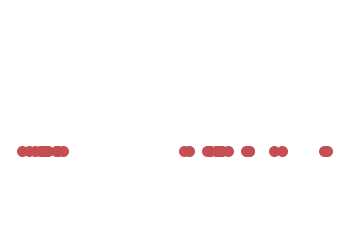

In [ ]:
plt.figure()
plt.plot(data_samples, [0] * len(data_samples), "ro", ms=10, label="data")
plt.axis("off")
plt.ylim(-1, 2)
plt.xticks([])
plt.yticks([])

In [ ]:
# Use another set of samples to exemplify samples from the model
data_samples2 = mixture.sample(30)

## Implicit generative model

An implicit generative model only provides us with samples. Here for simplicity, we use a different set of samples obtained from the data distribution (i.e, we assume a perfect model).

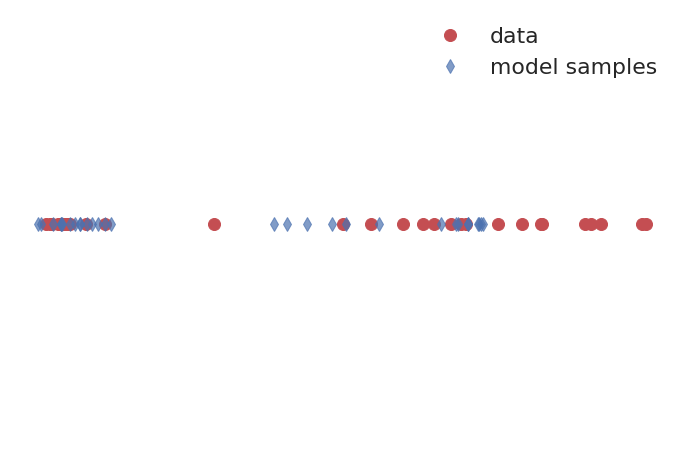

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(data_samples, [0] * len(data_samples), "ro", ms=12, label="data")
plt.plot(data_samples2, [0] * len(data_samples), "bd", ms=10, alpha=0.7, label="model samples")
plt.axis("off")
# plt.ylim(-0.2, 2)
# plt.xlim(-2, 3)
plt.xticks([])
plt.yticks([])
plt.legend(framealpha=0.0)

## Explicit generative models

An explicit generative model allows us to query for likelihoods under the learned distribution for points in the input space of the data. Here too we assume a perfect model in the plot, by using the data distribution pdf.

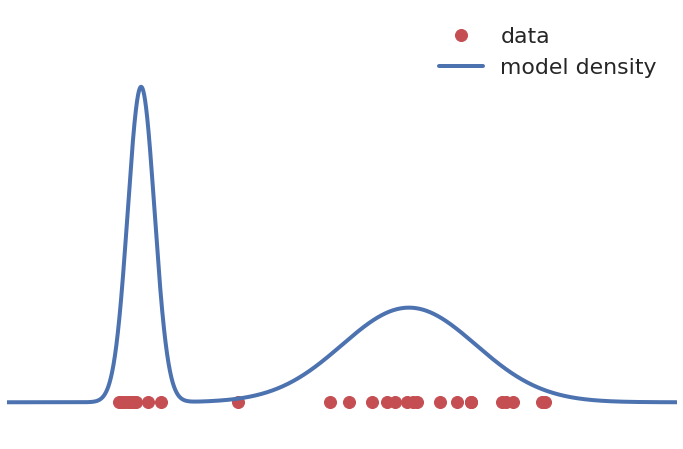

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(data_samples, [0] * len(data_samples), "ro", ms=12, label="data")

x_vals = np.linspace(-2.0, 3.0, int(1e4))
pdf_vals = mixture.pdf(x_vals)
plt.plot(x_vals, pdf_vals, linewidth=4, label="model density")

plt.axis("off")
plt.ylim(-0.2, 2)
plt.xlim(-2, 3)
plt.xticks([])
plt.yticks([])
plt.legend(framealpha=0)